In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder


data = pd.read_csv("C:\\Users\\alext\\OneDrive\\Skrivebord\\Test af kaggles\\data_stress.csv")
print(data.to_string())

     snoring range  respiration rate  body temperature  limb movement  blood oxygen   eye movement  hours of sleep  heart rate   Stress Levels
0           93.800            25.680            91.840         16.600         89.840         99.60           1.840        74.20              3
1           91.640            25.104            91.552         15.880         89.552         98.88           1.552        72.76              3
2           60.000            20.000            96.000         10.000         95.000         85.00           7.000        60.00              1
3           85.760            23.536            90.768         13.920         88.768         96.92           0.768        68.84              3
4           48.120            17.248            97.872          6.496         96.248         72.48           8.248        53.12              0
5           56.880            19.376            95.376          9.376         94.064         83.44           6.376        58.44              1

In [61]:
"""TIL AYA FOR AT ÆNDRE STRESS LEVEL OG MENTAL HEALTH TIL BINÆR"""
# Convert 'Stress_Level' to binary (0 for Low, 1 for Medium/High)
"""Fjern # Nedenunder"""
#data['Stress_Level'] = data['Stress_Level'].replace({'Low': 0, 'Medium': 1, 'High': 1})
"""Fjern # Ovenover"""


# Convert 'Mental_Health_Status' to binary (0 for Poor/Fair, 1 for Good/Excellent)
"""Fjern # Nedenunder"""
#data['Mental_Health_Status'] = data['Mental_Health_Status'].replace({'Poor': 0, 'Fair': 0, 'Good': 1, 'Excellent': 1})
"""Fjern # Ovenover"""

# Load the data (make sure 'data' is defined elsewhere in your code)
# data = pd.read_csv('path/to/your/file.csv')  # Uncomment if needed

"""Stress_level ordinal change"""
# Change for 'Stress_Level'
stress_sizes = ["Low", "Medium", "High"]
stress_encoder = OrdinalEncoder(categories=[stress_sizes])
data['Stress_Level'] = stress_encoder.fit_transform(data[['Stress_Level']])

"""Work_Environment_Impact ordinal change"""
# Change for 'Work_Environment_Impact'
work_env_sizes = ["Negative", "Neutral", "Positive"]
work_env_encoder = OrdinalEncoder(categories=[work_env_sizes])
data['Work_Environment_Impact'] = work_env_encoder.fit_transform(data[['Work_Environment_Impact']])

"""Change for Mental healt to ordinal"""
# Change for 'Mental_Health_Status'
mental_health_sizes = ["Poor", "Fair", "Good", "Excellent"]
mental_health_encoder = OrdinalEncoder(categories=[mental_health_sizes])
data['Mental_Health_Status'] = mental_health_encoder.fit_transform(data[['Mental_Health_Status']])

"""Convert Yes and No to binary 1 and 0"""
# Convert 'Yes'/'No' columns to 1 and 0 for specified columns
yes_no_columns = ['Support_Systems_Access', 'Online_Support_Usage']
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})


"""Change the age to categories"""
# Define age bins and labels
age_bins = [18, 24, 32, 40, 50, 65]
age_labels = ['18-24', '25-32', '33-40', '41-50', '50-65']

# Categorize 'Age' column based on defined bins
data['Age_Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)

# Apply one-hot encoding to the new 'Age_Category' column
data = pd.get_dummies(data, columns=['Age_Category'], prefix='Age')

# Convert boolean columns created by get_dummies() to integers (0 and 1)
age_columns = [col for col in data.columns if col.startswith('Age_')]
data[age_columns] = data[age_columns].astype(int)

# Remove the 'User_ID and age' column
data = data.drop(columns=['User_ID', "Age"])




# Display the modified data to ensure the transformations were applied correctly
print(data.to_string())

C:\Users\alext\AppData\Local\Temp\ipykernel_19336\2776322039.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})


      Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  Mental_Health_Status  Stress_Level  Sleep_Hours  Physical_Activity_Hours  Support_Systems_Access  Work_Environment_Impact  Online_Support_Usage  Age_18-24  Age_25-32  Age_33-40  Age_41-50  Age_50-65
0     Female                    6.57                      6.00          0.68              12.36                   2.0           0.0         8.01                     6.71                       0                      0.0                     1          1          0          0          0          0
1       Male                    3.01                      2.57          3.74               7.61                   0.0           2.0         7.28                     5.88                       1                      2.0                     0          1          0          0          0          0
2       Male                    3.04                      6.14          1.26               3.16                 

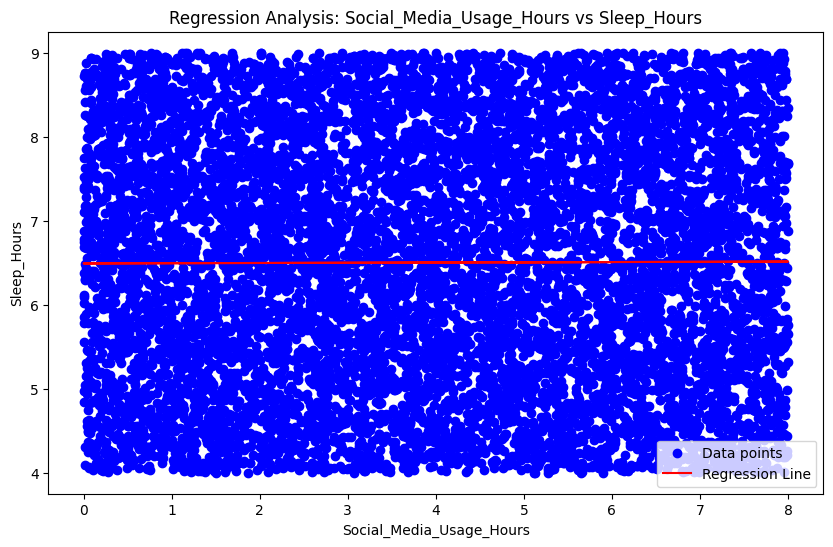

Regression equation: y = 0.00 * x + 6.49


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Select the two features for regression analysis
feature_x = 'Social_Media_Usage_Hours'
feature_y = 'Sleep_Hours'

# Reshape data for model fitting
X = data[[feature_x]].values.reshape(-1, 1)  # Independent variable
y = data[feature_y].values                   # Dependent variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values based on the model
y_pred = model.predict(X)

# Scatter plot of the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data points", color="blue")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Regression Analysis: {feature_x} vs {feature_y}")
plt.legend()
plt.show()

# Print the regression equation
print(f"Regression equation: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")
